In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import random
import os
import glob

%matplotlib inline
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [130]:
data = pd.read_csv("rides.csv")

In [131]:
data.head()

,date_time,date,day,uber_display_name,uber_distance,uber_duration,end_latitude,end_location,end_longitude,uber_max_estimate,...,start_latitude,start_location,start_longitude,time,weather,lyft_display_name,lyft_max_estimate,lyft_min_estimate,lyft_distance,lyft_duration
0,2/25/2018 0:00,25-Feb-18,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,13,...,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Lyft Premier,2081,2081,3.1,745
1,2/25/2018 0:00,25-Feb-18,Sunday,uberX,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,12,...,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Lyft Line,352,352,3.1,745
2,2/25/2018 0:00,25-Feb-18,Sunday,uberSUV,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,35,...,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Lyft Lux,2709,2709,3.1,745
3,2/25/2018 0:00,25-Feb-18,Sunday,uberXL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,20,...,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Lyft,1034,1034,3.1,745
4,2/25/2018 0:00,25-Feb-18,Sunday,UberBLACK,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,25,...,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Lyft Plus,1791,1791,3.1,745


In [132]:
data.columns

Index(['date_time', 'date', 'day', 'uber_display_name', 'uber_distance',
       'uber_duration', 'end_latitude', 'end_location', 'end_longitude',
       'uber_max_estimate', 'uber_min_estimate', 'main_temp', 'main_temp_max',
       'main_temp_min', 'uber_product_id', 'start_latitude', 'start_location',
       'start_longitude', 'time', 'weather', 'lyft_display_name',
       'lyft_max_estimate', 'lyft_min_estimate', 'lyft_distance',
       'lyft_duration'],
      dtype='object')

In [133]:
data['lyft_max_estimate_per_mile']=data['lyft_max_estimate'].divide(100).divide(data['lyft_distance'])

In [134]:
data['lyft_min_estimate_per_mile']=data['lyft_min_estimate'].divide(100).divide(data['lyft_distance'])

In [135]:
data['uber_max_estimate_per_mile']=data['uber_max_estimate'].divide(data['uber_distance'])

In [136]:
data['uber_min_estimate_per_mile']=data['uber_min_estimate'].divide(data['uber_distance'])

In [137]:
data['uber_max_estimate_per_sec']=data['uber_max_estimate'].divide(data['uber_duration'])

In [138]:
data['uber_min_estimate_per_sec']=data['uber_min_estimate'].divide(data['uber_duration'])

In [139]:
data['lyft_max_estimate_per_sec']=data['lyft_max_estimate'].divide(100).divide(data['lyft_duration'])

In [140]:
data['lyft_min_estimate_per_sec']=data['lyft_min_estimate'].divide(100).divide(data['lyft_duration'])

In [141]:
# data.to_csv('visual_spark_final.csv', sep=',')

In [142]:
data.head()

,date_time,date,day,uber_display_name,uber_distance,uber_duration,end_latitude,end_location,end_longitude,uber_max_estimate,...,lyft_distance,lyft_duration,lyft_max_estimate_per_mile,lyft_min_estimate_per_mile,uber_max_estimate_per_mile,uber_min_estimate_per_mile,uber_max_estimate_per_sec,uber_min_estimate_per_sec,lyft_max_estimate_per_sec,lyft_min_estimate_per_sec
0,2/25/2018 0:00,25-Feb-18,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,13,...,3.1,745,6.712903,6.712903,4.593640,3.180212,0.024074,0.016667,0.027933,0.027933
1,2/25/2018 0:00,25-Feb-18,Sunday,uberX,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,12,...,3.1,745,1.135484,1.135484,4.240283,3.180212,0.022222,0.016667,0.004725,0.004725
2,2/25/2018 0:00,25-Feb-18,Sunday,uberSUV,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,35,...,3.1,745,8.738710,8.738710,12.367491,9.893993,0.064815,0.051852,0.036362,0.036362
3,2/25/2018 0:00,25-Feb-18,Sunday,uberXL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,20,...,3.1,745,3.335484,3.335484,7.067138,5.300353,0.037037,0.027778,0.013879,0.013879
4,2/25/2018 0:00,25-Feb-18,Sunday,UberBLACK,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,25,...,3.1,745,5.777419,5.777419,8.833922,6.713781,0.046296,0.035185,0.024040,0.024040


In [143]:
data = data.set_index(pd.DatetimeIndex(data['date_time']))

In [144]:
data.index

DatetimeIndex(['2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:01:00', '2018-02-25 00:01:00',
               '2018-02-25 00:01:00', '2018-02-25 00:01:00',
               ...
               '2018-03-03 23:57:00', '2018-03-03 23:57:00',
               '2018-03-03 23:57:00', '2018-03-03 23:57:00',
               '2018-03-03 23:58:00', '2018-03-03 23:58:00',
               '2018-03-03 23:58:00', '2018-03-03 23:58:00',
               '2018-03-03 23:58:00', '2018-03-03 23:58:00'],
              dtype='datetime64[ns]', name='date_time', length=59880, freq=None)

In [161]:
data_feb26 = data[data.date == '26-Feb-18']
data_feb26_uber=data_feb26[data_feb26.uber_display_name=='POOL']
data_feb26_lyft=data_feb26[data_feb26.lyft_display_name=='Lyft Line']

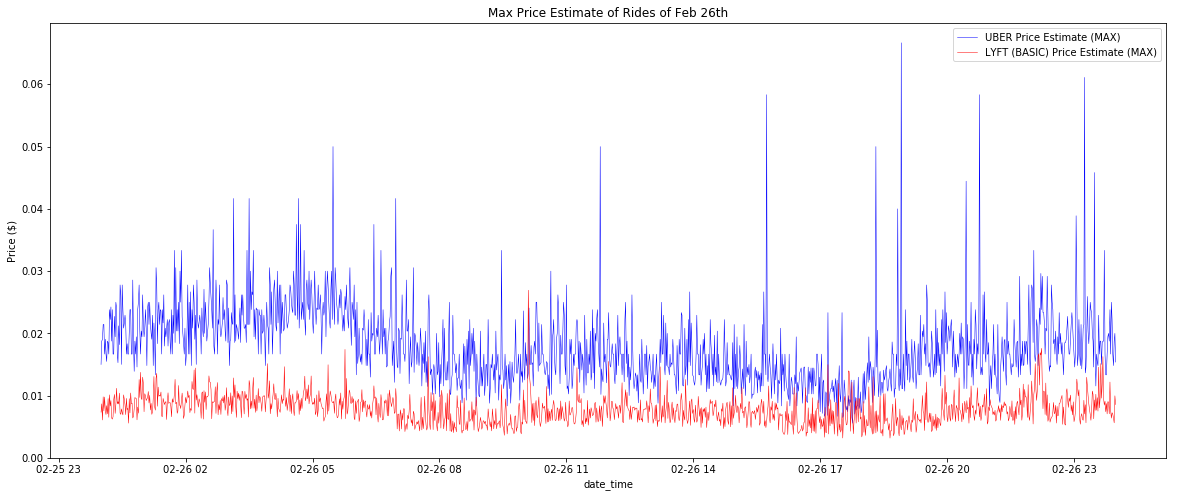

In [162]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_feb26_uber.index, data_feb26_uber['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_feb26_lyft.index, data_feb26_lyft['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Feb 26th')
plt.legend();

In [163]:
data_march2 = data[data.date == '2-Mar-18']
data_march2_uber=data_march2[data_march2.uber_display_name=='POOL']
data_march2_lyft=data_march2[data_march2.lyft_display_name=='Lyft Line']

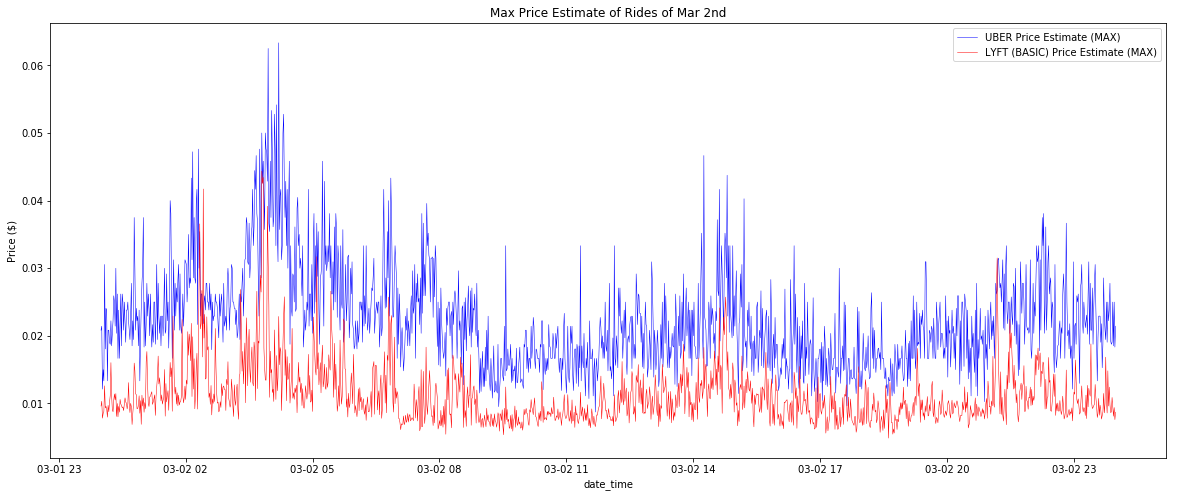

In [164]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_march2_uber.index, data_march2_uber['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_march2_lyft.index, data_march2_lyft['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Mar 2nd')
plt.legend();

In [165]:
data_mar3 = data[data.date == '3-Mar-18']
data_mar3_uber=data_mar3[data_mar3.uber_display_name=='POOL']
data_mar3_lyft=data_mar3[data_mar3.lyft_display_name=='Lyft Line']

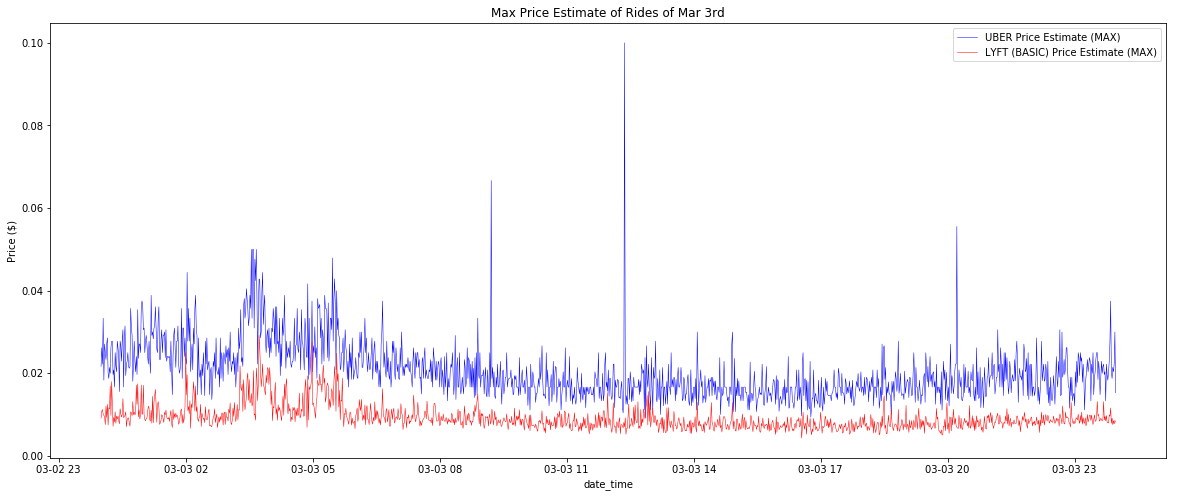

In [166]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_mar3_uber.index, data_mar3_uber['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_mar3_lyft.index, data_mar3_lyft['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Mar 3rd')
plt.legend();

In [151]:
data.uber_display_name.unique()

array(['POOL', 'uberX', 'uberSUV', 'uberXL', 'UberBLACK', 'uberWAV'],
      dtype=object)

UberX seats 4 passengers. Uber X cars are typically regular sedans like the Toyota Prius, Honda Accord.

UberXL seats 6 passengers. UberXL cars are SUVs and minivans. XL costs more than UberX

UberSelect is Uber’s entry-level luxury service that seats up to 4 riders. Select cars are brands like BMW, Mercededs, Audi, etc with a leather interior.

UberPOOL is a shared ride with another Uber user heading in a similar direction as you. Read more about POOL.

Express POOL is like POOL, but you’re required to walk to a nearby pickup spot

UberBLACK and UberSUV is Uber’s luxury service. Commercially registered and insured livery vehicles, typically a black SUV or luxury sedan. Black is the most expensive Uber service

In [152]:
data.lyft_display_name.unique()

array(['Lyft Premier', 'Lyft Line', 'Lyft Lux', 'Lyft', 'Lyft Plus',
       'Lyft Lux SUV'], dtype=object)

Lyft is an on-demand ride that seats up to four passengers. The lowest cost service.

Lyft Plus is a car that seats 6 or more passengers. More expensive than Lyft

Lyft Line is a ridesharing service that pairs you with other passengers who are traveling along the same route. Similar to a carpool.

Lyft Premier is a luxury sedan that seats 4 passengers

Lyft Lux is the most luxurious and most expensive option. 

Newer black luxury sedans and SUVs and highly rated drivers


In [153]:
data_evening_peak = data['2018-02-26 17:00:00' : '2018-02-26 19:59:59']

In [167]:
data_evening_peak_uber=data_evening_peak[data_evening_peak.uber_display_name=='POOL']
data_evening_peak_lyft=data_evening_peak[data_evening_peak.lyft_display_name=='Lyft Line']

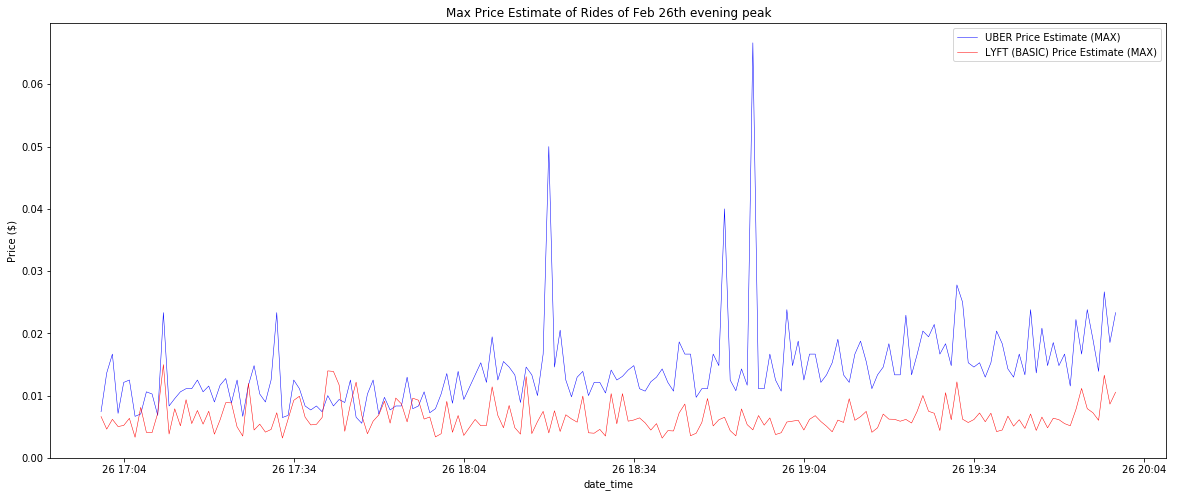

In [168]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_evening_peak_uber.index, data_evening_peak_uber['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_evening_peak_lyft.index, data_evening_peak_lyft['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Feb 26th evening peak')
plt.legend();

In [156]:
data_day_peak = data['2018-02-26 07:00:00' : '2018-02-26 10:59:59']

In [169]:
data_uber_day_peak=data_day_peak[data_day_peak.uber_display_name=='POOL']
data_lyft_day_peak=data_day_peak[data_day_peak.lyft_display_name=='Lyft Line']

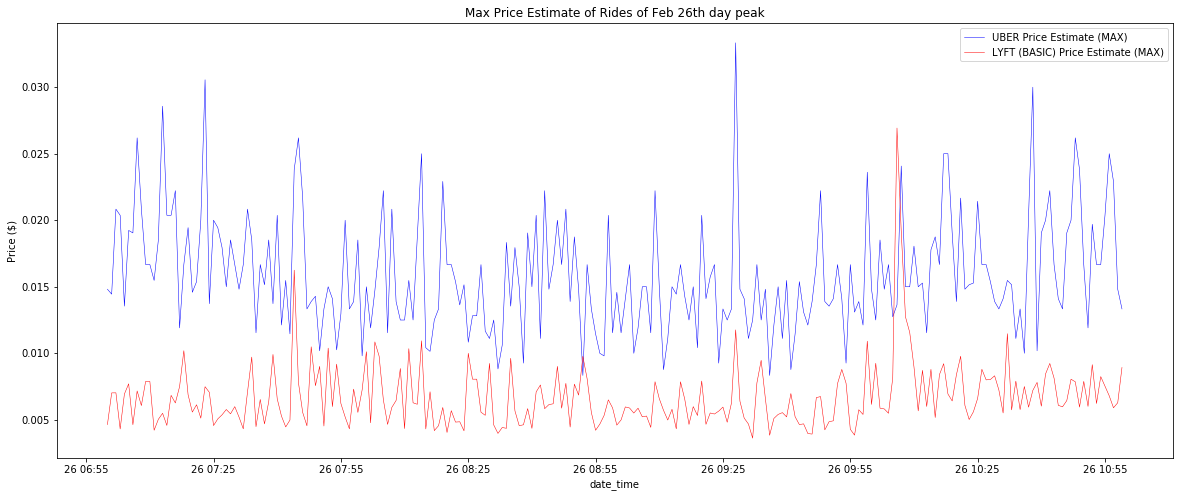

In [170]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_uber_day_peak.index, data_uber_day_peak['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_lyft_day_peak.index, data_lyft_day_peak['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Feb 26th day peak')
plt.legend();

In [159]:
from collections import Counter
number_uber_higher=Counter(data.uber_max_estimate>data.lyft_max_estimate)
print(number_uber_higher)

Counter({False: 59880})


In [181]:
data_uber=data[data.uber_display_name=='POOL']
data_lyft=data[data.lyft_display_name=='Lyft Line']
data_weather=data.weather

ValueError: x and y must have same first dimension, but have shapes (59880,) and (9980,)

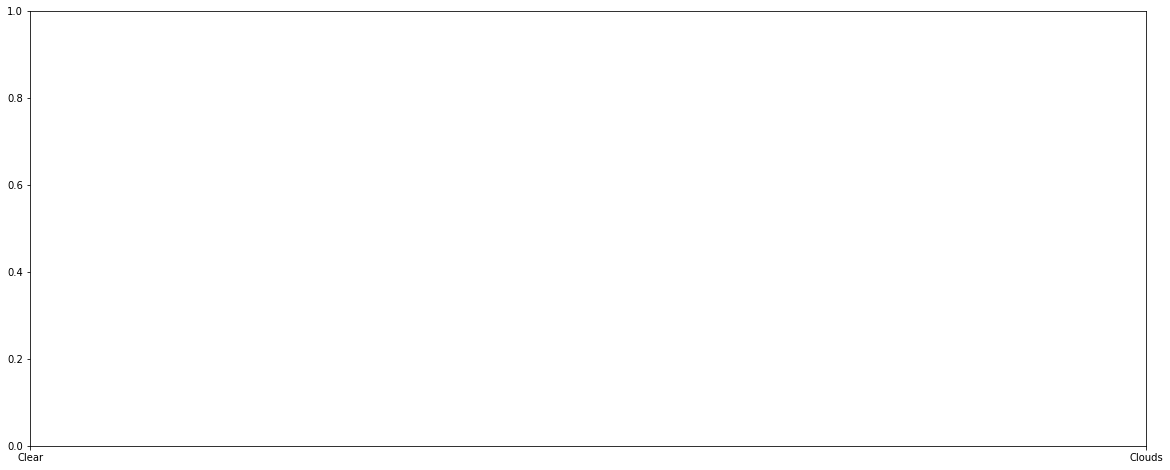

In [179]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(data_weather,data_uber['uber_max_estimate_per_sec'], 'b-', label = 'UBER Price Estimate (MAX)', lw=0.5)
plt.plot(data_weather,data_lyft['lyft_max_estimate_per_sec'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('date_time'); plt.ylabel('Price ($)'); 
plt.title('Max Price Estimate of Rides of Feb 26th day peak')
plt.legend();